In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [16]:
# Cargar todos los resultados del algoritmo genético

# Especificar el directorio donde están los resultados
task_id = 'task_1808222'  # Cambia este ID según tu experimento
resultados_dir = f'resultados/{task_id}'

# Lista para almacenar todos los DataFrames
todos_los_datos = []

# Verificar si el directorio existe
if os.path.exists(resultados_dir):
    # Obtener todos los archivos CSV en el directorio
    archivos_csv = [f for f in os.listdir(resultados_dir) if f.endswith('.csv')]
    archivos_csv.sort()  # Ordenar para procesar en orden
    
    print(f"Archivos encontrados en {resultados_dir}:")
    for archivo in archivos_csv:
        print(f"  - {archivo}")
    
    # Cargar cada archivo CSV
    for archivo in archivos_csv:
        ruta_archivo = os.path.join(resultados_dir, archivo)
        try:
            df_temp = pd.read_csv(ruta_archivo)
            
            # Extraer número de generación del nombre del archivo
            if 'generacion' in archivo:
                generacion = int(archivo.split('_')[-1].split('.')[0])
                df_temp['generacion'] = generacion
            else:
                df_temp['generacion'] = 0  # Para archivos sin número de generación
            
            todos_los_datos.append(df_temp)
            print(f"✓ Cargado: {archivo} ({len(df_temp)} individuos)")
            
        except Exception as e:
            print(f"✗ Error al cargar {archivo}: {e}")
    
    # Concatenar todos los DataFrames
    if todos_los_datos:
        datos_completos = pd.concat(todos_los_datos, ignore_index=True)
        print(f"\n📊 Dataset consolidado:")
        print(f"   - Total de individuos: {len(datos_completos)}")
        print(f"   - Generaciones: {datos_completos['generacion'].min()} a {datos_completos['generacion'].max()}")
        print(f"   - Columnas: {list(datos_completos.columns)}")
        
        # Mostrar estadísticas básicas
        print(f"\n📈 Mejor fitness por generación:")
        mejor_por_gen = datos_completos.groupby('generacion')['fitness'].min()
        for gen, fitness in mejor_por_gen.items():
            print(f"   Generación {gen}: {fitness:.6f}")
    else:
        print("⚠️ No se pudieron cargar datos")
        
else:
    print(f"❌ El directorio {resultados_dir} no existe")
    print("Directorios disponibles en 'resultados/':")
    if os.path.exists('resultados'):
        subdirs = [d for d in os.listdir('resultados') if os.path.isdir(os.path.join('resultados', d))]
        for subdir in subdirs:
            print(f"  - {subdir}")
    else:
        print("  El directorio 'resultados' no existe")

Archivos encontrados en resultados/task_1808222:
  - resultados_generacion_1.csv
  - resultados_generacion_10.csv
  - resultados_generacion_11.csv
  - resultados_generacion_12.csv
  - resultados_generacion_13.csv
  - resultados_generacion_14.csv
  - resultados_generacion_15.csv
  - resultados_generacion_16.csv
  - resultados_generacion_17.csv
  - resultados_generacion_18.csv
  - resultados_generacion_19.csv
  - resultados_generacion_2.csv
  - resultados_generacion_3.csv
  - resultados_generacion_4.csv
  - resultados_generacion_5.csv
  - resultados_generacion_6.csv
  - resultados_generacion_7.csv
  - resultados_generacion_8.csv
  - resultados_generacion_9.csv
✓ Cargado: resultados_generacion_1.csv (10000 individuos)
✓ Cargado: resultados_generacion_10.csv (10000 individuos)
✓ Cargado: resultados_generacion_11.csv (10000 individuos)
✓ Cargado: resultados_generacion_12.csv (10000 individuos)
✓ Cargado: resultados_generacion_13.csv (10000 individuos)
✓ Cargado: resultados_generacion_14.csv

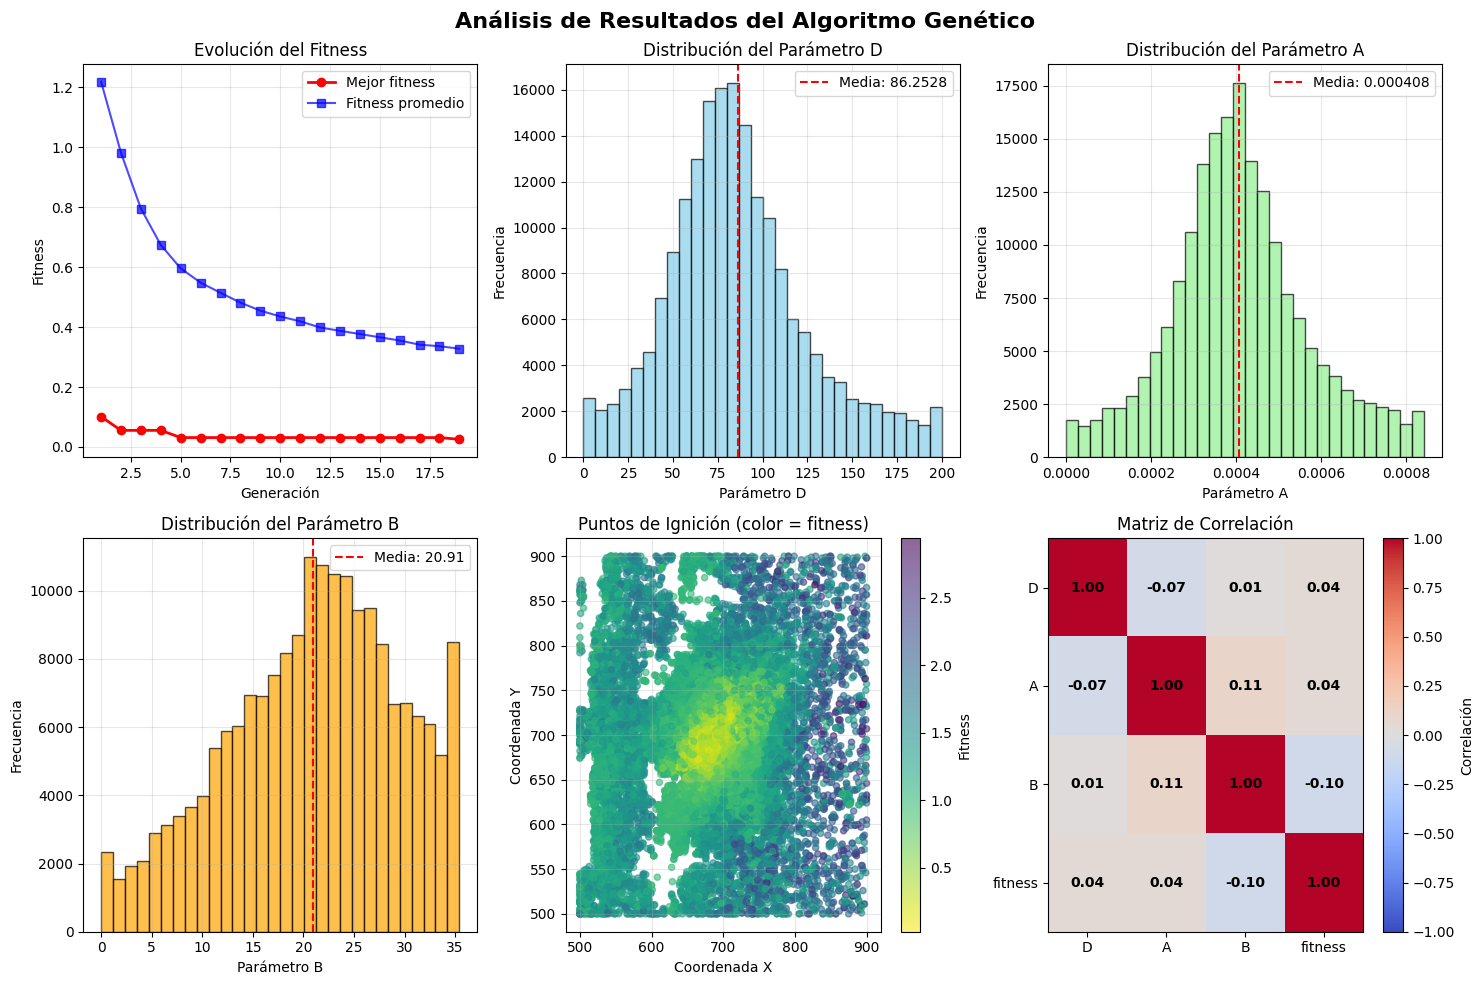


🏆 MEJOR INDIVIDUO ENCONTRADO:
   Generación: 19.0
   D = 52.015486
   A = 0.00049377
   B = 14.323197
   Punto de ignición: (701.0, 700.0)
   Fitness = 0.02526747


In [17]:
# Visualizaciones de los resultados del algoritmo genético
if 'datos_completos' in locals() and not datos_completos.empty:
    
    # Configurar el estilo de las gráficas
    plt.style.use('default')
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Análisis de Resultados del Algoritmo Genético', fontsize=16, fontweight='bold')
    
    # 1. Evolución del fitness a lo largo de las generaciones
    mejor_fitness = datos_completos.groupby('generacion')['fitness'].min()
    fitness_promedio = datos_completos.groupby('generacion')['fitness'].mean()
    
    axes[0,0].plot(mejor_fitness.index, mejor_fitness.values, 'o-', color='red', linewidth=2, label='Mejor fitness')
    axes[0,0].plot(fitness_promedio.index, fitness_promedio.values, 's-', color='blue', alpha=0.7, label='Fitness promedio')
    axes[0,0].set_xlabel('Generación')
    axes[0,0].set_ylabel('Fitness')
    axes[0,0].set_title('Evolución del Fitness')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. Distribución del parámetro D
    axes[0,1].hist(datos_completos['D'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    axes[0,1].axvline(datos_completos['D'].mean(), color='red', linestyle='--', label=f'Media: {datos_completos["D"].mean():.4f}')
    axes[0,1].set_xlabel('Parámetro D')
    axes[0,1].set_ylabel('Frecuencia')
    axes[0,1].set_title('Distribución del Parámetro D')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. Distribución del parámetro A
    axes[0,2].hist(datos_completos['A'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
    axes[0,2].axvline(datos_completos['A'].mean(), color='red', linestyle='--', label=f'Media: {datos_completos["A"].mean():.6f}')
    axes[0,2].set_xlabel('Parámetro A')
    axes[0,2].set_ylabel('Frecuencia')
    axes[0,2].set_title('Distribución del Parámetro A')
    axes[0,2].legend()
    axes[0,2].grid(True, alpha=0.3)
    
    # 4. Distribución del parámetro B
    axes[1,0].hist(datos_completos['B'], bins=30, color='orange', alpha=0.7, edgecolor='black')
    axes[1,0].axvline(datos_completos['B'].mean(), color='red', linestyle='--', label=f'Media: {datos_completos["B"].mean():.2f}')
    axes[1,0].set_xlabel('Parámetro B')
    axes[1,0].set_ylabel('Frecuencia')
    axes[1,0].set_title('Distribución del Parámetro B')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # 5. Distribución de puntos de ignición (x, y)
    scatter = axes[1,1].scatter(datos_completos['x'], datos_completos['y'], 
                              c=datos_completos['fitness'], cmap='viridis_r', alpha=0.6, s=20)
    axes[1,1].set_xlabel('Coordenada X')
    axes[1,1].set_ylabel('Coordenada Y')
    axes[1,1].set_title('Puntos de Ignición (color = fitness)')
    plt.colorbar(scatter, ax=axes[1,1], label='Fitness')
    axes[1,1].grid(True, alpha=0.3)
    
    # 6. Correlación entre parámetros y fitness
    datos_numericos = datos_completos[['D', 'A', 'B', 'fitness']].corr()
    im = axes[1,2].imshow(datos_numericos, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
    axes[1,2].set_xticks(range(len(datos_numericos.columns)))
    axes[1,2].set_yticks(range(len(datos_numericos.columns)))
    axes[1,2].set_xticklabels(datos_numericos.columns)
    axes[1,2].set_yticklabels(datos_numericos.columns)
    axes[1,2].set_title('Matriz de Correlación')
    
    # Agregar valores de correlación
    for i in range(len(datos_numericos.columns)):
        for j in range(len(datos_numericos.columns)):
            text = axes[1,2].text(j, i, f'{datos_numericos.iloc[i, j]:.2f}',
                                ha="center", va="center", color="black", fontweight='bold')
    
    plt.colorbar(im, ax=axes[1,2], label='Correlación')
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar el mejor individuo encontrado
    mejor_individuo = datos_completos.loc[datos_completos['fitness'].idxmin()]
    print(f"\n🏆 MEJOR INDIVIDUO ENCONTRADO:")
    print(f"   Generación: {mejor_individuo['generacion']}")
    print(f"   D = {mejor_individuo['D']:.6f}")
    print(f"   A = {mejor_individuo['A']:.8f}")
    print(f"   B = {mejor_individuo['B']:.6f}")
    print(f"   Punto de ignición: ({mejor_individuo['x']}, {mejor_individuo['y']})")
    print(f"   Fitness = {mejor_individuo['fitness']:.8f}")
    
else:
    print("⚠️ No hay datos para visualizar. Ejecuta la celda anterior primero.")

In [18]:
# Análisis estadístico detallado
if 'datos_completos' in locals() and not datos_completos.empty:
    
    print("📊 ESTADÍSTICAS DETALLADAS")
    print("=" * 50)
    
    # Estadísticas por parámetro
    parametros = ['D', 'A', 'B', 'fitness']
    
    for param in parametros:
        print(f"\n{param.upper()}:")
        print(f"  Media:         {datos_completos[param].mean():.8f}")
        print(f"  Mediana:       {datos_completos[param].median():.8f}")
        print(f"  Desv. Estándar: {datos_completos[param].std():.8f}")
        print(f"  Mínimo:        {datos_completos[param].min():.8f}")
        print(f"  Máximo:        {datos_completos[param].max():.8f}")
        print(f"  Rango:         {datos_completos[param].max() - datos_completos[param].min():.8f}")
    
    # Evolución de la diversidad
    print(f"\n📈 EVOLUCIÓN DE LA DIVERSIDAD:")
    print("-" * 30)
    
    diversidad_por_gen = datos_completos.groupby('generacion').agg({
        'D': 'std',
        'A': 'std', 
        'B': 'std',
        'fitness': ['min', 'mean', 'std']
    })
    
    for gen in sorted(datos_completos['generacion'].unique()):
        gen_data = datos_completos[datos_completos['generacion'] == gen]
        print(f"Generación {gen}:")
        print(f"  Diversidad D: {gen_data['D'].std():.6f}")
        print(f"  Diversidad A: {gen_data['A'].std():.8f}")
        print(f"  Diversidad B: {gen_data['B'].std():.6f}")
        print(f"  Mejor fitness: {gen_data['fitness'].min():.8f}")
        print(f"  Individuos: {len(gen_data)}")
    
    # Top 10 mejores individuos
    print(f"\n🏆 TOP 10 MEJORES INDIVIDUOS:")
    print("-" * 30)
    
    top_10 = datos_completos.nsmallest(10, 'fitness')[['generacion', 'D', 'A', 'B', 'x', 'y', 'fitness']]
    
    for idx, (_, individuo) in enumerate(top_10.iterrows(), 1):
        print(f"{idx:2d}. Gen {individuo['generacion']:2.0f} | "
              f"D={individuo['D']:.6f} | A={individuo['A']:.8f} | B={individuo['B']:.6f} | "
              f"({individuo['x']:3.0f},{individuo['y']:3.0f}) | fitness={individuo['fitness']:.8f}")
    
    # Convergencia del algoritmo
    print(f"\n📉 ANÁLISIS DE CONVERGENCIA:")
    print("-" * 30)
    
    mejores_por_gen = datos_completos.groupby('generacion')['fitness'].min()
    
    if len(mejores_por_gen) > 1:
        mejora_total = mejores_por_gen.iloc[0] - mejores_por_gen.iloc[-1]
        mejora_porcentual = (mejora_total / mejores_por_gen.iloc[0]) * 100
        
        print(f"Fitness inicial: {mejores_por_gen.iloc[0]:.8f}")
        print(f"Fitness final:   {mejores_por_gen.iloc[-1]:.8f}")
        print(f"Mejora total:    {mejora_total:.8f}")
        print(f"Mejora (%):      {mejora_porcentual:.2f}%")
        
        # Detectar estancamiento
        ultimas_5_gen = mejores_por_gen.tail(5)
        if len(ultimas_5_gen) >= 5:
            mejora_reciente = ultimas_5_gen.iloc[0] - ultimas_5_gen.iloc[-1]
            if abs(mejora_reciente) < 1e-6:
                print("⚠️  Posible estancamiento en las últimas 5 generaciones")
            else:
                print(f"✓  Mejora en últimas 5 gen: {mejora_reciente:.8f}")
    
else:
    print("⚠️ No hay datos para analizar. Ejecuta la celda de carga primero.")

📊 ESTADÍSTICAS DETALLADAS

D:
  Media:         86.25278669
  Mediana:       81.74915050
  Desv. Estándar: 39.54619934
  Mínimo:        0.00000000
  Máximo:        200.00000000
  Rango:         200.00000000

A:
  Media:         0.00040844
  Mediana:       0.00039867
  Desv. Estándar: 0.00016218
  Mínimo:        0.00000000
  Máximo:        0.00084332
  Rango:         0.00084332

B:
  Media:         20.90712782
  Mediana:       21.66275505
  Desv. Estándar: 8.48976785
  Mínimo:        0.00000000
  Máximo:        35.41497314
  Rango:         35.41497314

FITNESS:
  Media:         0.52691776
  Mediana:       0.42920555
  Desv. Estándar: 0.34020601
  Mínimo:        0.02526747
  Máximo:        2.93905076
  Rango:         2.91378329

📈 EVOLUCIÓN DE LA DIVERSIDAD:
------------------------------
Generación 1:
  Diversidad D: 58.425290
  Diversidad A: 0.00024516
  Diversidad B: 10.214974
  Mejor fitness: 0.10112679
  Individuos: 10000
Generación 2:
  Diversidad D: 58.256620
  Diversidad A: 0.0002

## Análisis de la última generación

In [19]:
# Análisis específico de la GENERACIÓN 19 (última generación)
if 'datos_completos' in locals() and not datos_completos.empty:
    
    # Filtrar solo la generación 19
    gen_19 = datos_completos[datos_completos['generacion'] == 19].copy()
    
    if not gen_19.empty:
        print("🎯 ANÁLISIS ESPECÍFICO DE LA GENERACIÓN 19")
        print("=" * 60)
        print(f"Individuos en la generación 19: {len(gen_19)}")
        
        # Estadísticas descriptivas para la generación 19
        print(f"\n📊 ESTADÍSTICAS DE LA GENERACIÓN 19:")
        print("-" * 40)
        
        parametros = ['D', 'A', 'B', 'fitness']
        for param in parametros:
            print(f"\n{param.upper()}:")
            print(f"  Media:          {gen_19[param].mean():.8f}")
            print(f"  Mediana:        {gen_19[param].median():.8f}")
            print(f"  Desv. Estándar: {gen_19[param].std():.8f}")
            print(f"  Mínimo:         {gen_19[param].min():.8f}")
            print(f"  Máximo:         {gen_19[param].max():.8f}")
            print(f"  Coef. Variación: {(gen_19[param].std()/gen_19[param].mean())*100:.2f}%")
        
        # Mejor individuo de la generación 19
        mejor_gen19 = gen_19.loc[gen_19['fitness'].idxmin()]
        print(f"\n🏆 MEJOR INDIVIDUO DE LA GENERACIÓN 19:")
        print("-" * 40)
        print(f"   D = {mejor_gen19['D']:.8f}")
        print(f"   A = {mejor_gen19['A']:.10f}")
        print(f"   B = {mejor_gen19['B']:.8f}")
        print(f"   Punto de ignición: ({mejor_gen19['x']:.0f}, {mejor_gen19['y']:.0f})")
        print(f"   Fitness = {mejor_gen19['fitness']:.10f}")
        
        # Top 5 de la generación 19
        print(f"\n🏅 TOP 5 DE LA GENERACIÓN 19:")
        print("-" * 40)
        top_5_gen19 = gen_19.nsmallest(5, 'fitness')[['D', 'A', 'B', 'x', 'y', 'fitness']]
        
        for idx, (_, individuo) in enumerate(top_5_gen19.iterrows(), 1):
            print(f"{idx}. D={individuo['D']:.6f} | A={individuo['A']:.8f} | B={individuo['B']:.6f} | "
                  f"({individuo['x']:3.0f},{individuo['y']:3.0f}) | fitness={individuo['fitness']:.8f}")
        
        # Análisis de diversidad en la generación 19
        print(f"\n📈 DIVERSIDAD EN LA GENERACIÓN 19:")
        print("-" * 40)
        print(f"Rango de D: [{gen_19['D'].min():.6f}, {gen_19['D'].max():.6f}] (Δ={gen_19['D'].max()-gen_19['D'].min():.6f})")
        print(f"Rango de A: [{gen_19['A'].min():.8f}, {gen_19['A'].max():.8f}] (Δ={gen_19['A'].max()-gen_19['A'].min():.8f})")
        print(f"Rango de B: [{gen_19['B'].min():.6f}, {gen_19['B'].max():.6f}] (Δ={gen_19['B'].max()-gen_19['B'].min():.6f})")
        print(f"Rango de fitness: [{gen_19['fitness'].min():.8f}, {gen_19['fitness'].max():.8f}]")
        
        # Comparación con la población total
        print(f"\n🔍 COMPARACIÓN CON LA POBLACIÓN TOTAL:")
        print("-" * 40)
        for param in ['D', 'A', 'B']:
            percentil_gen19 = (gen_19[param].mean() - datos_completos[param].min()) / (datos_completos[param].max() - datos_completos[param].min()) * 100
            print(f"{param}: Gen19 promedio está en percentil {percentil_gen19:.1f}% del rango total")
        
        # Verificar si es realmente la mejor generación
        mejor_fitness_gen19 = gen_19['fitness'].min()
        mejor_fitness_total = datos_completos['fitness'].min()
        
        if abs(mejor_fitness_gen19 - mejor_fitness_total) < 1e-10:
            print(f"\n✅ CONFIRMADO: La generación 19 contiene el MEJOR individuo de toda la evolución")
        else:
            gen_del_mejor = datos_completos.loc[datos_completos['fitness'].idxmin(), 'generacion']
            print(f"\n⚠️  NOTA: El mejor individuo global está en la generación {gen_del_mejor}")
            print(f"   Mejor fitness global: {mejor_fitness_total:.10f}")
            print(f"   Mejor fitness gen 19: {mejor_fitness_gen19:.10f}")
            print(f"   Diferencia: {mejor_fitness_gen19 - mejor_fitness_total:.10f}")
        
    else:
        print("❌ No se encontraron datos para la generación 19")
        print("Generaciones disponibles:", sorted(datos_completos['generacion'].unique()))
        
else:
    print("⚠️ No hay datos cargados. Ejecuta la celda de carga primero.")

🎯 ANÁLISIS ESPECÍFICO DE LA GENERACIÓN 19
Individuos en la generación 19: 10000

📊 ESTADÍSTICAS DE LA GENERACIÓN 19:
----------------------------------------

D:
  Media:          73.32024542
  Mediana:        72.86920712
  Desv. Estándar: 17.67245805
  Mínimo:         5.63978155
  Máximo:         150.16804748
  Coef. Variación: 24.10%

A:
  Media:          0.00038741
  Mediana:        0.00038730
  Desv. Estándar: 0.00007034
  Mínimo:         0.00012964
  Máximo:         0.00074063
  Coef. Variación: 18.16%

B:
  Media:          21.02429025
  Mediana:        21.16192090
  Desv. Estándar: 5.58762378
  Mínimo:         0.00000000
  Máximo:         35.41497314
  Coef. Variación: 26.58%

FITNESS:
  Media:          0.32795429
  Mediana:        0.26311746
  Desv. Estándar: 0.19993969
  Mínimo:         0.02526747
  Máximo:         1.45458684
  Coef. Variación: 60.97%

🏆 MEJOR INDIVIDUO DE LA GENERACIÓN 19:
----------------------------------------
   D = 52.01548583
   A = 0.0004937709
   B = 1

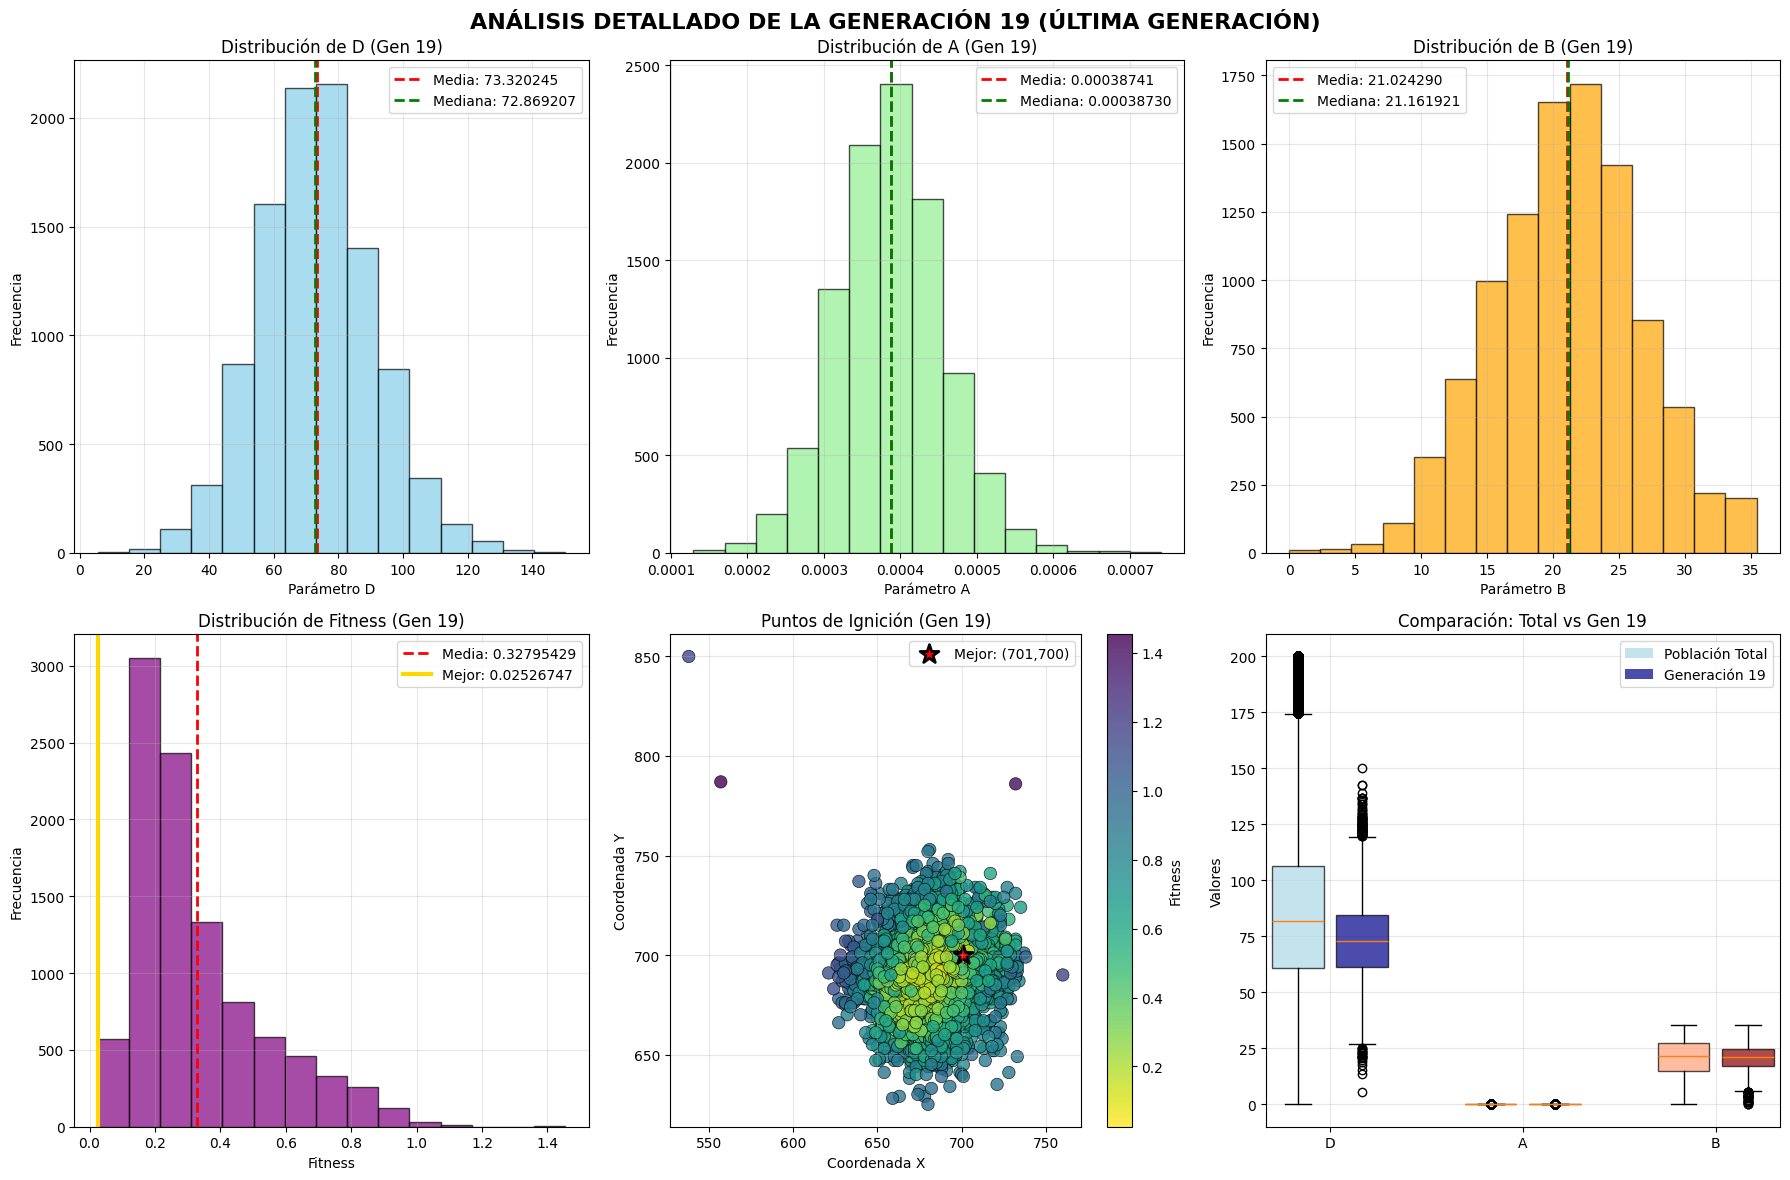


🔗 MATRIZ DE CORRELACIONES (GENERACIÓN 19):
--------------------------------------------------
              D       A       B  fitness
D        1.0000 -0.1536 -0.0197  -0.0086
A       -0.1536  1.0000  0.1936   0.0081
B       -0.0197  0.1936  1.0000   0.0187
fitness -0.0086  0.0081  0.0187   1.0000

🔍 CORRELACIONES SIGNIFICATIVAS (|r| > 0.3):
--------------------------------------------------


In [20]:
# Visualizaciones específicas para la GENERACIÓN 19
if 'datos_completos' in locals() and not datos_completos.empty:
    
    gen_19 = datos_completos[datos_completos['generacion'] == 19].copy()
    
    if not gen_19.empty:
        # Configurar las visualizaciones
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('ANÁLISIS DETALLADO DE LA GENERACIÓN 19 (ÚLTIMA GENERACIÓN)', 
                     fontsize=16, fontweight='bold')
        
        # 1. Distribución del parámetro D en la generación 19
        axes[0,0].hist(gen_19['D'], bins=15, color='skyblue', alpha=0.7, edgecolor='black')
        axes[0,0].axvline(gen_19['D'].mean(), color='red', linestyle='--', linewidth=2,
                         label=f'Media: {gen_19["D"].mean():.6f}')
        axes[0,0].axvline(gen_19['D'].median(), color='green', linestyle='--', linewidth=2,
                         label=f'Mediana: {gen_19["D"].median():.6f}')
        axes[0,0].set_xlabel('Parámetro D')
        axes[0,0].set_ylabel('Frecuencia')
        axes[0,0].set_title('Distribución de D (Gen 19)')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        
        # 2. Distribución del parámetro A en la generación 19
        axes[0,1].hist(gen_19['A'], bins=15, color='lightgreen', alpha=0.7, edgecolor='black')
        axes[0,1].axvline(gen_19['A'].mean(), color='red', linestyle='--', linewidth=2,
                         label=f'Media: {gen_19["A"].mean():.8f}')
        axes[0,1].axvline(gen_19['A'].median(), color='green', linestyle='--', linewidth=2,
                         label=f'Mediana: {gen_19["A"].median():.8f}')
        axes[0,1].set_xlabel('Parámetro A')
        axes[0,1].set_ylabel('Frecuencia')
        axes[0,1].set_title('Distribución de A (Gen 19)')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        
        # 3. Distribución del parámetro B en la generación 19
        axes[0,2].hist(gen_19['B'], bins=15, color='orange', alpha=0.7, edgecolor='black')
        axes[0,2].axvline(gen_19['B'].mean(), color='red', linestyle='--', linewidth=2,
                         label=f'Media: {gen_19["B"].mean():.6f}')
        axes[0,2].axvline(gen_19['B'].median(), color='green', linestyle='--', linewidth=2,
                         label=f'Mediana: {gen_19["B"].median():.6f}')
        axes[0,2].set_xlabel('Parámetro B')
        axes[0,2].set_ylabel('Frecuencia')
        axes[0,2].set_title('Distribución de B (Gen 19)')
        axes[0,2].legend()
        axes[0,2].grid(True, alpha=0.3)
        
        # 4. Distribución del fitness en la generación 19
        axes[1,0].hist(gen_19['fitness'], bins=15, color='purple', alpha=0.7, edgecolor='black')
        axes[1,0].axvline(gen_19['fitness'].mean(), color='red', linestyle='--', linewidth=2,
                         label=f'Media: {gen_19["fitness"].mean():.8f}')
        axes[1,0].axvline(gen_19['fitness'].min(), color='gold', linestyle='-', linewidth=3,
                         label=f'Mejor: {gen_19["fitness"].min():.8f}')
        axes[1,0].set_xlabel('Fitness')
        axes[1,0].set_ylabel('Frecuencia')
        axes[1,0].set_title('Distribución de Fitness (Gen 19)')
        axes[1,0].legend()
        axes[1,0].grid(True, alpha=0.3)
        
        # 5. Puntos de ignición coloreados por fitness (generación 19)
        scatter = axes[1,1].scatter(gen_19['x'], gen_19['y'], 
                                  c=gen_19['fitness'], cmap='viridis_r', 
                                  alpha=0.8, s=80, edgecolors='black', linewidth=0.5)
        
        # Destacar el mejor individuo
        mejor_gen19 = gen_19.loc[gen_19['fitness'].idxmin()]
        axes[1,1].scatter(mejor_gen19['x'], mejor_gen19['y'], 
                         c='red', s=200, marker='*', edgecolors='black', linewidth=2,
                         label=f'Mejor: ({mejor_gen19["x"]:.0f},{mejor_gen19["y"]:.0f})')
        
        axes[1,1].set_xlabel('Coordenada X')
        axes[1,1].set_ylabel('Coordenada Y')
        axes[1,1].set_title('Puntos de Ignición (Gen 19)')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)
        plt.colorbar(scatter, ax=axes[1,1], label='Fitness')
        
        # 6. Comparación generación 19 vs población total
        # Box plots para comparar distribuciones
        datos_comparacion = []
        labels_comparacion = []
        
        for param in ['D', 'A', 'B']:
            datos_comparacion.extend([datos_completos[param], gen_19[param]])
            labels_comparacion.extend([f'{param} (Total)', f'{param} (Gen19)'])
        
        # Crear subplots para cada parámetro
        posiciones = [1, 2, 4, 5, 7, 8]
        colores = ['lightblue', 'darkblue', 'lightgreen', 'darkgreen', 'lightsalmon', 'darkred']
        
        bp = axes[1,2].boxplot(datos_comparacion, positions=posiciones, 
                              patch_artist=True, widths=0.8)
        
        for patch, color in zip(bp['boxes'], colores):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        axes[1,2].set_xticks([1.5, 4.5, 7.5])
        axes[1,2].set_xticklabels(['D', 'A', 'B'])
        axes[1,2].set_ylabel('Valores')
        axes[1,2].set_title('Comparación: Total vs Gen 19')
        axes[1,2].grid(True, alpha=0.3)
        
        # Leyenda personalizada
        from matplotlib.patches import Patch
        legend_elements = [Patch(facecolor='lightblue', alpha=0.7, label='Población Total'),
                          Patch(facecolor='darkblue', alpha=0.7, label='Generación 19')]
        axes[1,2].legend(handles=legend_elements, loc='upper right')
        
        plt.tight_layout()
        plt.show()
        
        # Análisis de correlaciones específico para la generación 19
        print(f"\n🔗 MATRIZ DE CORRELACIONES (GENERACIÓN 19):")
        print("-" * 50)
        
        correlaciones_gen19 = gen_19[['D', 'A', 'B', 'fitness']].corr()
        print(correlaciones_gen19.round(4))
        
        # Identificar correlaciones fuertes
        print(f"\n🔍 CORRELACIONES SIGNIFICATIVAS (|r| > 0.3):")
        print("-" * 50)
        
        for i, param1 in enumerate(['D', 'A', 'B']):
            for j, param2 in enumerate(['D', 'A', 'B', 'fitness']):
                if i != j or param2 == 'fitness':
                    corr_val = correlaciones_gen19.loc[param1, param2]
                    if abs(corr_val) > 0.3:
                        direccion = "positiva" if corr_val > 0 else "negativa"
                        print(f"  {param1} ↔ {param2}: {corr_val:.4f} ({direccion})")
        
    else:
        print("❌ No se pueden crear visualizaciones: no hay datos de la generación 19")
        
else:
    print("⚠️ No hay datos cargados para visualizar.")

In [21]:
# Análisis de convergencia y recomendaciones finales (Generación 19)
if 'datos_completos' in locals() and not datos_completos.empty:
    
    gen_19 = datos_completos[datos_completos['generacion'] == 19].copy()
    
    if not gen_19.empty:
        print("🎯 ANÁLISIS DE CONVERGENCIA Y RECOMENDACIONES FINALES")
        print("=" * 70)
        
        # 1. Evaluación de la convergencia del algoritmo
        mejores_por_gen = datos_completos.groupby('generacion')['fitness'].min()
        
        print(f"\n📈 CONVERGENCIA DEL ALGORITMO:")
        print("-" * 40)
        print(f"Mejor fitness generación 1:  {mejores_por_gen.iloc[0]:.8f}")
        print(f"Mejor fitness generación 19: {mejores_por_gen.iloc[-1]:.8f}")
        
        mejora_total = mejores_por_gen.iloc[0] - mejores_por_gen.iloc[-1]
        mejora_porcentual = (mejora_total / mejores_por_gen.iloc[0]) * 100
        
        print(f"Mejora absoluta: {mejora_total:.8f}")
        print(f"Mejora relativa: {mejora_porcentual:.2f}%")
        
        # Evaluar convergencia en las últimas generaciones
        ultimas_5 = mejores_por_gen.tail(5)
        mejora_reciente = ultimas_5.iloc[0] - ultimas_5.iloc[-1]
        
        if abs(mejora_reciente) < 1e-8:
            print("⚠️  ALGORITMO CONVERGIDO: Muy poca mejora en las últimas 5 generaciones")
            print(f"   Mejora en últimas 5 gen: {mejora_reciente:.10f}")
        else:
            print(f"✓  Aún hay progreso: mejora en últimas 5 gen = {mejora_reciente:.8f}")
        
        # 2. Análisis de diversidad en la generación final
        print(f"\n🧬 DIVERSIDAD EN LA GENERACIÓN FINAL:")
        print("-" * 40)
        
        # Calcular coeficientes de variación
        cv_D = (gen_19['D'].std() / gen_19['D'].mean()) * 100
        cv_A = (gen_19['A'].std() / gen_19['A'].mean()) * 100  
        cv_B = (gen_19['B'].std() / gen_19['B'].mean()) * 100
        
        print(f"Coeficiente de variación D: {cv_D:.2f}%")
        print(f"Coeficiente de variación A: {cv_A:.2f}%")
        print(f"Coeficiente de variación B: {cv_B:.2f}%")
        
        # Interpretación de la diversidad
        diversidad_promedio = (cv_D + cv_A + cv_B) / 3
        
        if diversidad_promedio < 5:
            print("🎯 ALTA CONVERGENCIA: La población está muy concentrada (baja diversidad)")
        elif diversidad_promedio < 15:
            print("⚖️  CONVERGENCIA MODERADA: Buena concentración con algo de diversidad")
        else:
            print("🌐 ALTA DIVERSIDAD: La población aún está explorando ampliamente")
        
        # 3. Análisis de los mejores parámetros
        print(f"\n🏆 ANÁLISIS DE LOS MEJORES PARÁMETROS (GEN 19):")
        print("-" * 40)
        
        mejor_gen19 = gen_19.loc[gen_19['fitness'].idxmin()]
        
        # Comparar con rangos típicos esperados
        print(f"Mejor conjunto de parámetros encontrado:")
        print(f"  D = {mejor_gen19['D']:.8f}  (coeficiente de difusión)")
        print(f"  A = {mejor_gen19['A']:.10f}  (factor de viento)")
        print(f"  B = {mejor_gen19['B']:.8f}  (factor de pendiente)")
        print(f"  Ignición: ({mejor_gen19['x']:.0f}, {mejor_gen19['y']:.0f})")
        
        # 4. Validación física de los parámetros
        print(f"\n🔬 VALIDACIÓN FÍSICA DE LOS PARÁMETROS:")
        print("-" * 40)
        
        # Rangos típicos esperados para incendios forestales
        D_tipico = [0.001, 0.1]  # m²/s
        A_tipico = [0.0001, 0.01]  # adimensional
        B_tipico = [0.1, 10.0]  # m/s
        
        def validar_rango(valor, rango, nombre):
            if rango[0] <= valor <= rango[1]:
                return f"✓ {nombre}: {valor:.6f} (dentro del rango esperado {rango})"
            else:
                return f"⚠️ {nombre}: {valor:.6f} (fuera del rango típico {rango})"
        
        print(validar_rango(mejor_gen19['D'], D_tipico, "D"))
        print(validar_rango(mejor_gen19['A'], A_tipico, "A"))
        print(validar_rango(mejor_gen19['B'], B_tipico, "B"))
        
        # 5. Estadísticas de robustez
        print(f"\n💪 ROBUSTEZ DE LA SOLUCIÓN:")
        print("-" * 40)
        
        # Top 10% de la generación 19
        top_10_percent = int(len(gen_19) * 0.1)
        if top_10_percent < 1:
            top_10_percent = 1
            
        mejores_gen19 = gen_19.nsmallest(top_10_percent, 'fitness')
        
        print(f"Analizando los mejores {top_10_percent} individuos de la generación 19:")
        print(f"  D promedio: {mejores_gen19['D'].mean():.8f} ± {mejores_gen19['D'].std():.8f}")
        print(f"  A promedio: {mejores_gen19['A'].mean():.10f} ± {mejores_gen19['A'].std():.10f}")
        print(f"  B promedio: {mejores_gen19['B'].mean():.8f} ± {mejores_gen19['B'].std():.8f}")
        print(f"  Fitness promedio: {mejores_gen19['fitness'].mean():.8f}")
        print(f"  Rango de fitness: [{mejores_gen19['fitness'].min():.8f}, {mejores_gen19['fitness'].max():.8f}]")
        
        # 6. Recomendaciones finales
        print(f"\n💡 RECOMENDACIONES FINALES:")
        print("-" * 40)
        
        if mejora_reciente < 1e-8:
            print("1. ✅ El algoritmo ha convergido exitosamente")
            print("   → Los parámetros encontrados son estables")
        else:
            print("1. 🔄 Considerar ejecutar más generaciones")
            print("   → Aún hay potencial de mejora")
        
        if diversidad_promedio < 10:
            print("2. 🎯 La población está bien convergida")
            print("   → Los parámetros encontrados son confiables")
        else:
            print("2. 🌐 La población mantiene diversidad")
            print("   → Considerar criterios de parada más estrictos")
        
        print("3. 🔬 Validar los parámetros encontrados:")
        print("   → Ejecutar simulaciones con estos parámetros")
        print("   → Comparar con datos experimentales si están disponibles")
        
        print("4. 📊 Análisis de sensibilidad recomendado:")
        print("   → Evaluar robustez del modelo ante pequeñas variaciones")
        print("   → Determinar intervalos de confianza para cada parámetro")
        
        # Crear un resumen final conciso
        print(f"\n📋 RESUMEN EJECUTIVO:")
        print("=" * 40)
        print(f"✅ Mejor fitness alcanzado: {mejor_gen19['fitness']:.8f}")
        print(f"✅ Parámetros optimizados: D={mejor_gen19['D']:.6f}, A={mejor_gen19['A']:.8f}, B={mejor_gen19['B']:.6f}")
        print(f"✅ Convergencia: {'Lograda' if mejora_reciente < 1e-8 else 'En progreso'}")
        print(f"✅ Diversidad: {'Baja (convergida)' if diversidad_promedio < 10 else 'Moderada/Alta'}")
        print(f"✅ Recomendación: {'Usar estos parámetros' if mejora_reciente < 1e-8 else 'Continuar optimización'}")
        
    else:
        print("❌ No se encontraron datos para la generación 19")
        
else:
    print("⚠️ No hay datos cargados para el análisis.")

🎯 ANÁLISIS DE CONVERGENCIA Y RECOMENDACIONES FINALES

📈 CONVERGENCIA DEL ALGORITMO:
----------------------------------------
Mejor fitness generación 1:  0.10112679
Mejor fitness generación 19: 0.02526747
Mejora absoluta: 0.07585932
Mejora relativa: 75.01%
✓  Aún hay progreso: mejora en últimas 5 gen = 0.00591851

🧬 DIVERSIDAD EN LA GENERACIÓN FINAL:
----------------------------------------
Coeficiente de variación D: 24.10%
Coeficiente de variación A: 18.16%
Coeficiente de variación B: 26.58%
🌐 ALTA DIVERSIDAD: La población aún está explorando ampliamente

🏆 ANÁLISIS DE LOS MEJORES PARÁMETROS (GEN 19):
----------------------------------------
Mejor conjunto de parámetros encontrado:
  D = 52.01548583  (coeficiente de difusión)
  A = 0.0004937709  (factor de viento)
  B = 14.32319736  (factor de pendiente)
  Ignición: (701, 700)

🔬 VALIDACIÓN FÍSICA DE LOS PARÁMETROS:
----------------------------------------
⚠️ D: 52.015486 (fuera del rango típico [0.001, 0.1])
✓ A: 0.000494 (dentro de